In [0]:
#1
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Dropout,Flatten
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [44]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

4423680/4422102 [==============================] - 0s 0us/step




In [0]:
#normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [46]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 108us/step - loss: 0.4023 - val_loss: 0.3540
Epoch 2/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.3448 - val_loss: 0.3378
Epoch 3/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.3327 - val_loss: 0.3298
Epoch 4/15
60000/60000 [==============================] - 5s 88us/step - loss: 0.3269 - val_loss: 0.3261
Epoch 5/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.3230 - val_loss: 0.3273
Epoch 6/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.3198 - val_loss: 0.3142
Epoch 7/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.3179 - val_loss: 0.3169
Epoch 8/15
60000/60000 [==============================] - 5s 89us/step - loss: 0.3161 - val_loss: 0.3201
Epoch 9/15
60000/60000 [==============================] - 5s 86us/step - loss: 0.3147 - val_loss: 0.3183
Epoc

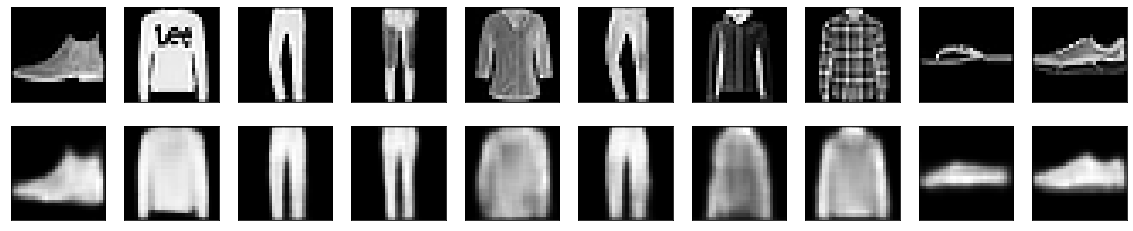

In [47]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

2.
Kernal size is 3 by 3, strides is 1 by 1, no padding, this is CNN with 2 convolutional layers. 

In [0]:
#2 
#2.1
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#10 dimensational class
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

In [59]:
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               1179904   
_________________________________________________________________
dense_16 (Dense)             (None, 10)              

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_trainin = model.fit(x_train, y_train, validation_data=(x_test, y_test),
          epochs=10,
          batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.4251 - acc: 0.8480 - val_loss: 0.3559 - val_acc: 0.8741
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2906 - acc: 0.8947 - val_loss: 0.2956 - val_acc: 0.8894
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.2520 - acc: 0.9088 - val_loss: 0.2574 - val_acc: 0.9048
Epoch 4/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2311 - acc: 0.9165 - val_loss: 0.2622 - val_acc: 0.9050
Epoch 5/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2140 - acc: 0.9208 - val_loss: 0.2424 - val_acc: 0.9133
Epoch 6/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.2056 - acc: 0.9245 - val_loss: 0.2594 - val_acc: 0.9067
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.1917 - acc: 0.9289 - val_loss: 0.2530 - val_acc

In [61]:
score = model.evaluate(x_test, y_test, verbose=1)
score


10000/10000 [==============================] - 1s 69us/step


[0.2667414271891117, 0.9075]

In [62]:
score_train = model.evaluate(x_train, y_train, verbose=1)
score_train

60000/60000 [==============================] - 4s 66us/step


[0.1419377581698199, 0.9478]

In [0]:
#2.2

In [0]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Flatten, LeakyReLU
from keras.optimizers import RMSprop
from keras import callbacks

In [0]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
#print(train_x.shape)

In [74]:
# normalize data
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

train_x = train_x.reshape(train_x.shape[0], 28, 28,1)
test_x = test_x.reshape(test_x.shape[0], 28, 28,1)
print(train_x.shape)
print(test_x.shape)

# normalize
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
#10 dimensational class
train_y = np_utils.to_categorical(train_y, 10) 
test_y = np_utils.to_categorical(test_y, 10)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
import cv2

In [76]:

train_x1 = np.asarray([cv2.resize(x, (48,48)) for x in train_x])
test_x1 = np.asarray([cv2.resize(x, (48,48)) for x in test_x])
train_x1 = train_x1.reshape(train_x.shape[0], 48, 48,1)
test_x1  = test_x1.reshape(test_x.shape[0], 48, 48, 1)
train_x1 = train_x1.repeat(3, axis=-1)
test_x1  = test_x1.repeat(3, axis=-1)
print(train_x1.shape)
print(test_x1.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)


In [0]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3))
conv_base.trainable = False

In [78]:
# fit the model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation="softmax"))
model.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [79]:
# compile
model.compile(loss="categorical_crossentropy", 
              optimizer='adam',
              metrics=["acc"])
# fit
model_train1 = model.fit(train_x1, train_y,
          epochs=10,
          shuffle=True,
          batch_size=128,
          validation_data=(test_x1,test_y))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.5433 - acc: 0.8115 - val_loss: 0.4392 - val_acc: 0.8419
Epoch 2/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.3893 - acc: 0.8589 - val_loss: 0.3995 - val_acc: 0.8587
Epoch 3/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.3564 - acc: 0.8709 - val_loss: 0.3763 - val_acc: 0.8652
Epoch 4/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.3356 - acc: 0.8773 - val_loss: 0.3721 - val_acc: 0.8676
Epoch 5/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.3218 - acc: 0.8818 - val_loss: 0.3560 - val_acc: 0.8732
Epoch 6/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.3065 - acc: 0.8873 - val_loss: 0.3527 - val_acc: 0.8772
Epoch 7/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.2939 - acc: 0.8928 - val_loss: 0.

In [80]:
score = model.evaluate(test_x1, y_test, verbose=1)
score

10000/10000 [==============================] - 3s 297us/step


[0.3379911565065384, 0.8811]

In [81]:
score_train = model.evaluate(train_x1, y_train, verbose=1)
score_train

60000/60000 [==============================] - 17s 287us/step


[0.24420803466935953, 0.91195]

In [0]:
#3.1

In [0]:
#use RNN
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.layers import SimpleRNN, Embedding


In [90]:
from google.colab import files
uploadedfile = files.upload()


Saving tweets_with_labels.csv to tweets_with_labels (1).csv


In [91]:
import io
df = io.BytesIO(uploadedfile['tweets_with_labels.csv']) 
df = pd.read_csv(df,delimiter='\t')
df.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
from gensim.corpora import Dictionary

In [0]:
tweet1 = list(df['tweet'].map(lambda x: list(x)))

# use gensim
dct = Dictionary(tweet1)  # Dictionary
X=list(df['tweet'].map(lambda x:dct.doc2idx(list(x))))
y = df.loc[:,'k1':'k15']

In [0]:
#split into training and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [0]:
X_train=sequence.pad_sequences(X_train,maxlen=30,padding="post", truncating="post")
X_test=sequence.pad_sequences(X_test,maxlen=30,padding="post", truncating="post")

In [96]:
X_train[0]

array([31,  6,  5, 14, 35,  6, 13,  0, 68, 10, 12, 34,  0, 17, 10,  8, 11,
        9, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.recurrent import LSTM

In [98]:
modelrnn = Sequential()
modelrnn.add(Embedding(len(dct), 50))
modelrnn.add(SimpleRNN(32))
modelrnn.add(Dense(15, activation='softmax'))
#binary crossentropy
modelrnn.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

modelrnn_train = modelrnn.fit(X_train, y_train, epochs = 35, batch_size = 256,
                   validation_data=(X_test,y_test))
                    

Train on 54562 samples, validate on 23384 samples
Epoch 1/35
54562/54562 [==============================] - 5s 85us/step - loss: 2.6168 - acc: 0.2985 - val_loss: 2.5980 - val_acc: 0.2825
Epoch 2/35
54562/54562 [==============================] - 4s 64us/step - loss: 2.4932 - acc: 0.3511 - val_loss: 2.6085 - val_acc: 0.3006
Epoch 3/35
54562/54562 [==============================] - 4s 64us/step - loss: 2.4566 - acc: 0.3715 - val_loss: 2.4311 - val_acc: 0.3839
Epoch 4/35
54562/54562 [==============================] - 4s 64us/step - loss: 2.4283 - acc: 0.3885 - val_loss: 2.4537 - val_acc: 0.3659
Epoch 5/35
54562/54562 [==============================] - 4s 65us/step - loss: 2.4049 - acc: 0.3989 - val_loss: 2.4418 - val_acc: 0.3845
Epoch 6/35
54562/54562 [==============================] - 4s 64us/step - loss: 2.3874 - acc: 0.4084 - val_loss: 2.4017 - val_acc: 0.3912
Epoch 7/35
54562/54562 [==============================] - 3s 64us/step - loss: 2.3708 - acc: 0.4171 - val_loss: 2.4316 - val_acc

In [99]:
#sigmoid
modelrnn1 = Sequential()
modelrnn1.add(Embedding(len(dct), 50))
modelrnn1.add(SimpleRNN(32))
modelrnn1.add(Dense(15, activation='sigmoid'))
#binary crossentropy
modelrnn1.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

modelrnn1_train = modelrnn1.fit(X_train, y_train, epochs = 35, batch_size = 256,
                   validation_data=(X_test,y_test))
                    

Train on 54562 samples, validate on 23384 samples
Epoch 1/35
54562/54562 [==============================] - 5s 86us/step - loss: 0.2800 - acc: 0.8661 - val_loss: 0.2337 - val_acc: 0.8743
Epoch 2/35
54562/54562 [==============================] - 4s 65us/step - loss: 0.2330 - acc: 0.8748 - val_loss: 0.2319 - val_acc: 0.8743
Epoch 3/35
54562/54562 [==============================] - 4s 66us/step - loss: 0.2302 - acc: 0.8748 - val_loss: 0.2304 - val_acc: 0.8743
Epoch 4/35
54562/54562 [==============================] - 4s 64us/step - loss: 0.2275 - acc: 0.8748 - val_loss: 0.2265 - val_acc: 0.8743
Epoch 5/35
54562/54562 [==============================] - 3s 64us/step - loss: 0.2262 - acc: 0.8749 - val_loss: 0.2265 - val_acc: 0.8744
Epoch 6/35
54562/54562 [==============================] - 4s 64us/step - loss: 0.2236 - acc: 0.8757 - val_loss: 0.2269 - val_acc: 0.8755
Epoch 7/35
54562/54562 [==============================] - 3s 64us/step - loss: 0.2199 - acc: 0.8778 - val_loss: 0.2239 - val_acc

In [0]:
#3.2

In [0]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D

In [24]:
#sigmoid
cnn_model = Sequential()
cnn_model.add(Embedding(len(dct),50))
cnn_model.add(Conv1D(64, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(15, activation='sigmoid'))
cnn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          4700      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)          16064     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                975       
Total params: 21,739
Trainable params: 21,739
Non-trainable params: 0
_________________________________________________________________


In [25]:
cnn_model_training = cnn_model.fit(X_train, y_train, epochs = 35, batch_size = 256,
                   validation_data=(X_test,y_test))




Train on 54562 samples, validate on 23384 samples
Epoch 1/35





54562/54562 [==============================] - 9s 173us/step - loss: 0.2650 - acc: 0.8733 - val_loss: 0.2046 - val_acc: 0.8808
Epoch 2/35
54562/54562 [==============================] - 1s 23us/step - loss: 0.1934 - acc: 0.8869 - val_loss: 0.1875 - val_acc: 0.8882
Epoch 3/35
54562/54562 [==============================] - 1s 22us/step - loss: 0.1836 - acc: 0.8901 - val_loss: 0.1825 - val_acc: 0.8893
Epoch 4/35
54562/54562 [==============================] - 1s 23us/step - loss: 0.1794 - acc: 0.8911 - val_loss: 0.1801 - val_acc: 0.8897
Epoch 5/35
54562/54562 [==============================] - 1s 23us/step - loss: 0.1768 - acc: 0.8917 - val_loss: 0.1784 - val_acc: 0.8907
Epoch 6/35
54562/54562 [==============================] - 1s 22us/step - loss: 0.1750 - acc: 0.8920 - val_loss: 0.1773 - val_acc: 0.8902
Epoch 7/35
54562/54562 [==============================] - 1s 23us/step - loss: 0.1736 - acc: 0.8922 - val_loss: 0.1757 

In [0]:
#categorical crossentropy

In [29]:
cnn1_model = Sequential()
cnn1_model.add(Embedding(len(dct),50))
cnn1_model.add(Conv1D(64, 5, activation='relu'))
cnn1_model.add(GlobalMaxPooling1D())
cnn1_model.add(Dense(15, activation='softmax'))
cnn1_model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])
cnn1_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 50)          4700      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 64)          16064     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                975       
Total params: 21,739
Trainable params: 21,739
Non-trainable params: 0
_________________________________________________________________


In [30]:
cnn1_model_training = cnn1_model.fit(X_train, y_train, epochs = 35, batch_size = 256,
                   validation_data=(X_test,y_test))

Train on 54562 samples, validate on 23384 samples
Epoch 1/35
54562/54562 [==============================] - 1s 27us/step - loss: 2.3946 - acc: 0.4357 - val_loss: 2.1552 - val_acc: 0.5080
Epoch 2/35
54562/54562 [==============================] - 1s 23us/step - loss: 2.0848 - acc: 0.5366 - val_loss: 2.0530 - val_acc: 0.5423
Epoch 3/35
54562/54562 [==============================] - 1s 23us/step - loss: 2.0145 - acc: 0.5567 - val_loss: 2.0149 - val_acc: 0.5464
Epoch 4/35
54562/54562 [==============================] - 1s 24us/step - loss: 1.9810 - acc: 0.5633 - val_loss: 1.9937 - val_acc: 0.5532
Epoch 5/35
54562/54562 [==============================] - 1s 23us/step - loss: 1.9592 - acc: 0.5685 - val_loss: 1.9835 - val_acc: 0.5571
Epoch 6/35
54562/54562 [==============================] - 1s 24us/step - loss: 1.9432 - acc: 0.5728 - val_loss: 1.9677 - val_acc: 0.5639
Epoch 7/35
54562/54562 [==============================] - 1s 23us/step - loss: 1.9302 - acc: 0.5763 - val_loss: 1.9650 - val_acc

In [0]:
#3.3

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


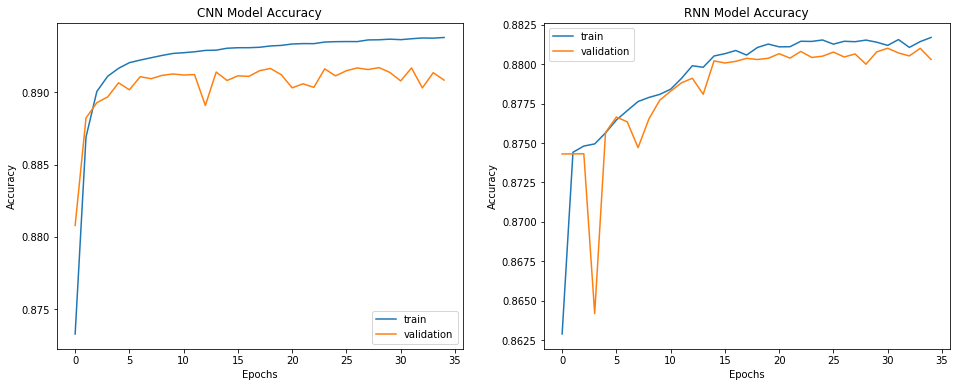

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_training.history['acc'])
plt.plot(cnn_model_training.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(modelrnn1_train.history['acc'])
plt.plot(modelrnn1_train.history['val_acc'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()